## Slide 15

In [16]:
Challenger <- data.frame(flt = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23),
                        temp = c(66,70,69,68,67,72,73,70,57,63,70,78,67,53,67,75,70,81,76,79,75,76,58),
                          td = c(0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1))

In [17]:
Challenger <- Challenger[order(Challenger$td),]; row.names(Challenger)<-1:23

OR, more compact:

In [18]:
Challenger<-read.csv2("../Presentation_A/Data/Challenger.csv")
Challenger <- Challenger[order(Challenger$td),]; row.names(Challenger)<-1:23
head(Challenger)

,flt,temp,td
,<int>,<int>,<int>
1,1,66,0
2,3,69,0
3,4,68,0
4,5,67,0
5,6,72,0
6,7,73,0


In [19]:
t.test(Challenger$temp[Challenger$td == 0], Challenger$temp[Challenger$td == 1])


	Welch Two Sample t-test

data:  Challenger$temp[Challenger$td == 0] and Challenger$temp[Challenger$td == 1]
t = 2.5387, df = 7.9166, p-value = 0.03507
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  0.7569431 16.0644855
sample estimates:
mean of x mean of y 
 72.12500  63.71429 


In [20]:
t.test(Challenger$temp[Challenger$td == 0], Challenger$temp[Challenger$td == 1], var.eq = TRUE)


	Two Sample t-test

data:  Challenger$temp[Challenger$td == 0] and Challenger$temp[Challenger$td == 1]
t = 3.1032, df = 21, p-value = 0.005383
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.774344 14.047085
sample estimates:
mean of x mean of y 
 72.12500  63.71429 


OR, more compact: 

(formula form does not support var.equal=T);

In [21]:
with(Challenger, t.test(temp~td))
with(Challenger, t.test(temp[td==0],temp[td==1],var.eq=T))


	Welch Two Sample t-test

data:  temp by td
t = 2.5387, df = 7.9166, p-value = 0.03507
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
  0.7569431 16.0644855
sample estimates:
mean in group 0 mean in group 1 
       72.12500        63.71429 



	Two Sample t-test

data:  temp[td == 0] and temp[td == 1]
t = 3.1032, df = 21, p-value = 0.005383
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.774344 14.047085
sample estimates:
mean of x mean of y 
 72.12500  63.71429 


In [22]:
# just the p-value:
with(Challenger, t.test(temp~td))$p.value
with(Challenger, t.test(temp[td==0],temp[td==1],var.eq=T))$p.value

[1] 0.03506834

[1] 0.005382629

In [23]:
# alternative, using the bracket operator [:
t.test(Challenger$temp[Challenger$td == 0], Challenger$temp[Challenger$td == 1])
t.test(Challenger$temp[Challenger$td == 0], Challenger$temp[Challenger$td == 1], 
var.eq = TRUE)


	Welch Two Sample t-test

data:  Challenger$temp[Challenger$td == 0] and Challenger$temp[Challenger$td == 1]
t = 2.5387, df = 7.9166, p-value = 0.03507
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  0.7569431 16.0644855
sample estimates:
mean of x mean of y 
 72.12500  63.71429 



	Two Sample t-test

data:  Challenger$temp[Challenger$td == 0] and Challenger$temp[Challenger$td == 1]
t = 3.1032, df = 21, p-value = 0.005383
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.774344 14.047085
sample estimates:
mean of x mean of y 
 72.12500  63.71429 


## Slide 17:

### Histograms:

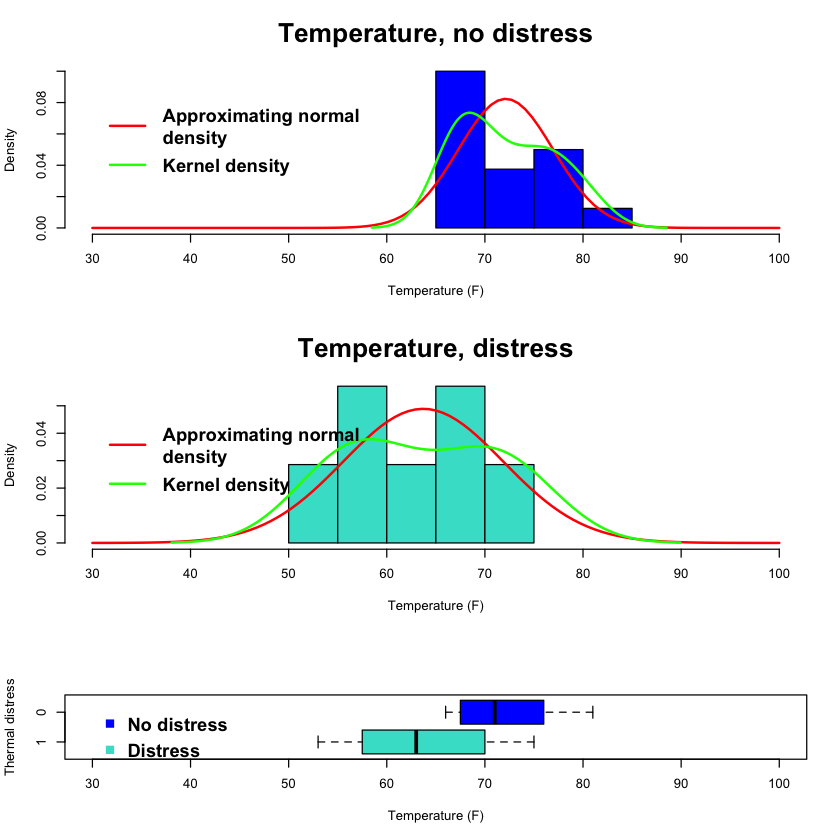

In [24]:
layout.matrix<-matrix(c(1,1,1,2,2,2,3,3),ncol=1)
layout(layout.matrix)
with(Challenger,
       hist(temp[td==0],xlim=c(30,100),probability=T,xlab='Temperature (F)',
       main ="Temperature, no distress",col="blue",cex.main=2))
with(Challenger,
       curve(dnorm(x,mean=mean(temp[td==0]),sd=sd(temp[td==0])),30,100,
             col="red",lwd=2,add=T))
with(Challenger,
       lines(density(temp[td==0])$x,density(temp[td==0])$y,type="l",
             lwd=2,col="green"))
legend(30,0.09,c("Approximating normal\ndensity","Kernel density"),lty=1,
       col=c("red","green"),bty="n",cex=1.4,text.font=2,lwd=2)

with(Challenger,
       hist(temp[td==1],xlim=c(30,100),probability=T,xlab='Temperature (F)',
       main ="Temperature, distress",col="turquoise",cex.main=2))
with(Challenger,
       curve(dnorm(x,mean=mean(temp[td==1]),sd=sd(temp[td==1])),30,100,
             col="red",lwd=2,add=T))
with(Challenger,
       lines(density(temp[td==1])$x,density(temp[td==1])$y,type="l",
             lwd=2,col="green"))
legend(30,0.05,c("Approximating normal\ndensity","Kernel density"),lty=1,
       col=c("red","green"),bty="n",cex=1.4,text.font=2,lwd=2)

with(Challenger, boxplot(temp~1-td,horizontal=T,at=c(1,0),col=c("blue","turquoise"),
     xlab="Temperature (F)",ylab="Thermal distress",ylim=c(30,100)))
legend(30,1.5,c("No distress","Distress"),col=c("blue","turquoise"),bty="n",
       pch=15,cex=1.4,text.font=2)

## Slide 19:

In [25]:
# means and summaries:

with(Challenger,by(temp,td,summary))

# t-test:

my.t.test<-data.frame(td=0:1)
my.t.test$n<-with(Challenger,tapply(temp,td,length))
my.t.test$mean<-with(Challenger,tapply(temp,td,mean))
my.t.test$sem<-with(Challenger,tapply(temp,td,sd))/
               sqrt(my.t.test$n)
my.t.test$lower<-my.t.test$mean-qt(0.95,df=my.t.test$n-1)*my.t.test$sem
my.t.test$upper<-my.t.test$mean+qt(0.95,df=my.t.test$n-1)*my.t.test$sem
my.t.test$t.equal.var<-c(NA,with(Challenger, 
                         t.test(temp[td==0],temp[td==1],var.eq=T))$stat)
my.t.test$t<-c(NA,with(Challenger, 
               t.test(temp[td==0],temp[td==1]))$stat)
my.t.test$p.equal.var<-c(NA,with(Challenger, 
                         t.test(temp[td==0],temp[td==1],var.eq=T))$p.value)
my.t.test$p<-c(NA, with(Challenger, 
               t.test(temp[td==0],temp[td==1]))$p.value)

my.t.test[,3:8]<-round(my.t.test[,3:8],digits=2)
my.t.test[,9]<-format.pval(my.t.test[,9],eps=0.0001,digits=1)
my.t.test[,10]<-format.pval(my.t.test[,10],eps=0.0001,digits=1)
my.t.test


# How does the variance look?

with(Challenger, tapply(temp,td,var))

# library(car)
leveneTest(temp~as.factor(td),data=Challenger)

# borderlining significance; doubtful if support for equal variances. 

td: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  66.00   67.75   71.00   72.12   76.00   81.00 
------------------------------------------------------------ 
td: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  53.00   57.50   63.00   63.71   70.00   75.00 

td,n,mean,sem,lower,upper,t.equal.var,t,p.equal.var,p
<int>,<int[1d]>,<dbl[1d]>,<dbl[1d]>,<dbl[1d]>,<dbl[1d]>,<dbl>,<dbl>,<chr>,<chr>
0,16,72.12,1.21,70.00,74.25,NA,NA,NA,NA
1,7,63.71,3.08,57.72,69.71,3.1,2.54,0.005,0.04


0        1 
23.45000 66.57143

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.662801,0.06936794
,21,NA,NA


## Slide 20:

[1] 0.005423021

[1] 0.03505687

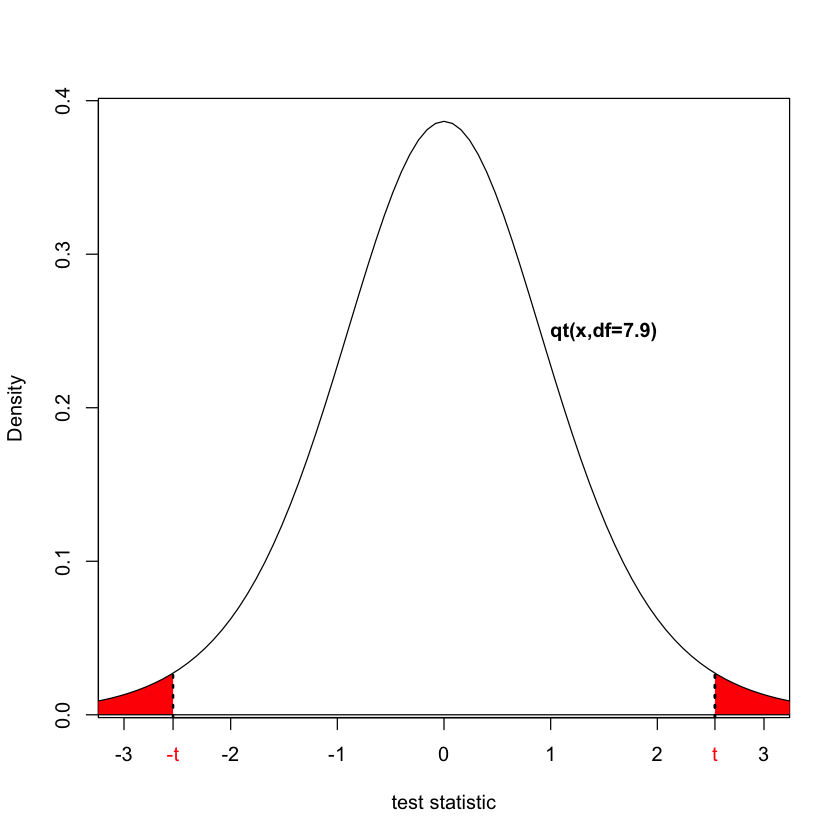

In [26]:
2*pt(-3.10,df=21); 2*pt(-2.54,df=7.9)


curve(dt(x,df=7.9),-3,3,lty=0,ylab='Density',xlab='test statistic',xaxt="n")
axis(1)
polygon(c(-4,-4,-4+(1:100/100)*(4-2.54),-2.54),
        c(0,dt(-4+(0:100/100)*(4-2.54),df=7.9),0),col="red",lty=0)
polygon(c(4,4,4+(1:100/100)*(-4+2.54),2.54),
        c(0,dt(4+(0:100/100)*(-4+2.54),df=7.9),0),col="red",lty=0)
curve(dt(x,df=7.9),-4,4,add=T)
lines(c(-4,4),rep(0,2),type="l")
lines(rep(-2.54,2),c(par("usr")[3],dt(-2.54,df=7.9)),lty=3,lwd=2)
lines(rep(2.54,2),c(par("usr")[3],dt(2.54,df=7.9)),lty=3,lwd=2)
lines(rep(2.54,2),c(par("usr")[3],dt(2.54,df=7.9)),lty=3,lwd=2)
axis(1,labels=c("-t","t"),at=c(-2.54,2.54),cex=0.3,col.axis="red")
text(1.5,0.25,"qt(x,df=7.9)",font=2)

## Slide 23:

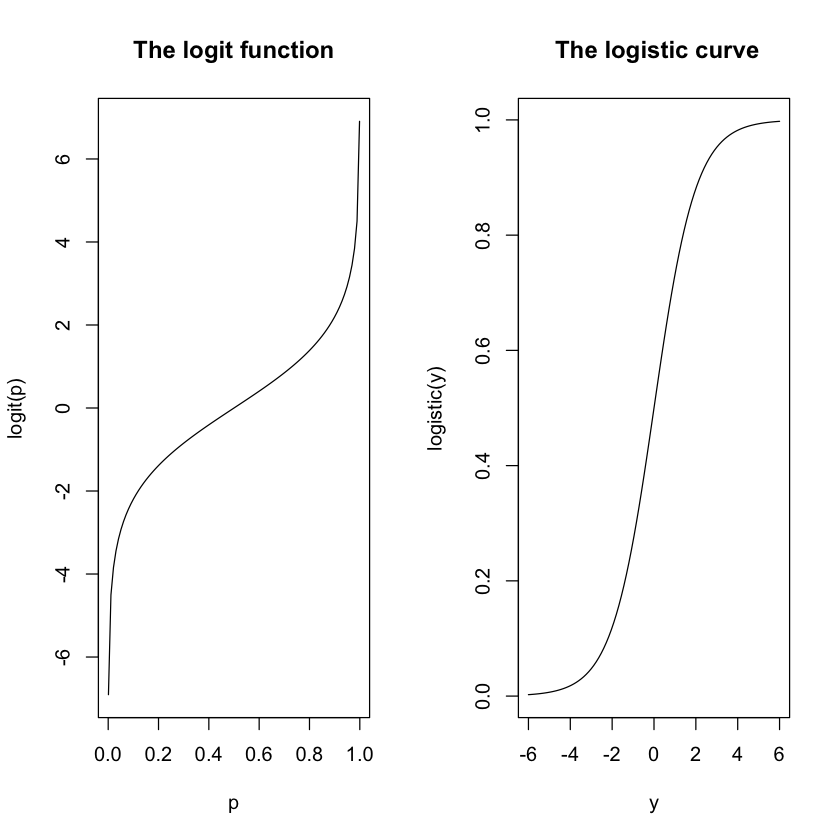

In [27]:
logit<-function(p){log(p/(1-p))}
logistic<-function(y){exp(y)/(1+exp(y))}

par(mfrow=c(1,2))
curve(logit,0.001,0.999,xlab='p',ylab='logit(p)', main="The logit function")
curve(logistic,-6,6,xlab='y',ylab='logistic(y)',main=" The logistic curve")
par(mfrow=c(1,1))

## Slide 24:

In [28]:
model <- glm(td ~ temp, family=binomial(link='logit'), data=Challenger)
summary(model)
drop1(model,test="Chisq")


Call:
glm(formula = td ~ temp, family = binomial(link = "logit"), data = Challenger)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  15.0429     7.3786   2.039   0.0415 *
temp         -0.2322     0.1082  -2.145   0.0320 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 28.267  on 22  degrees of freedom
Residual deviance: 20.315  on 21  degrees of freedom
AIC: 24.315

Number of Fisher Scoring iterations: 5


,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,20.31519,24.31519,NA,NA
temp,1,28.26715,30.26715,7.95196,0.004803533


## Slide 25:

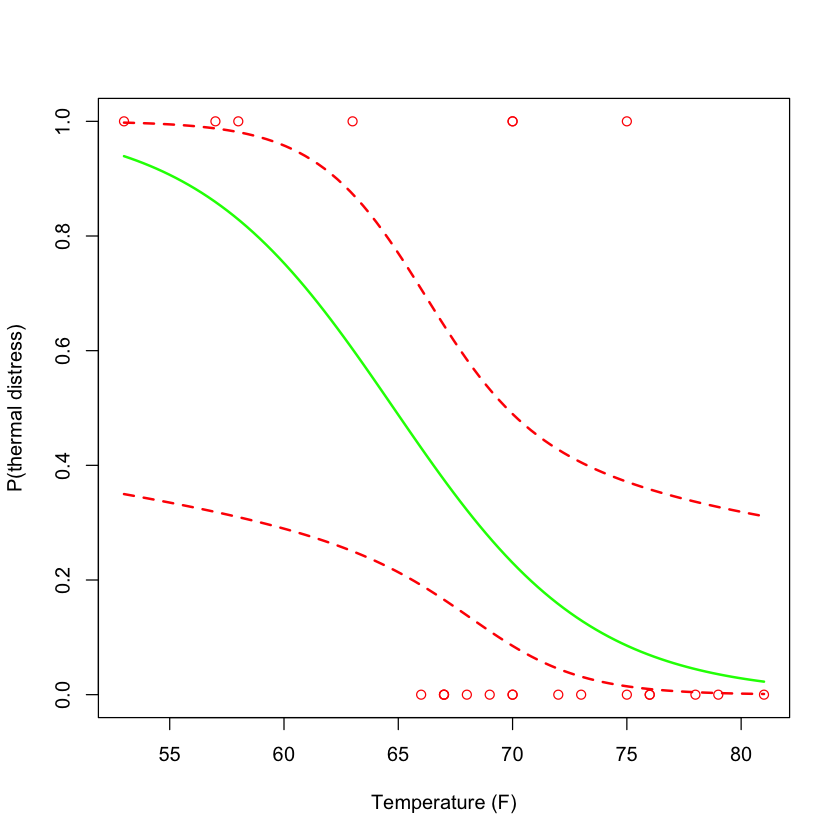

In [29]:
newdat <- data.frame(temp=seq(min(Challenger$temp), 
                              max(Challenger$temp),length=100))
newdat$fit = predict(model, newdata=newdat)
newdat$se<-predict(model, newdata=newdat,se.fit=T)$se.fit
plot(td ~ temp, data=Challenger, col="red",xlab="Temperature (F)",
     ylab="P(thermal distress)")
lines(logistic(fit)~ temp, data=newdat, col="green", lwd=2)
lines(logistic(fit+1.96*se)~ temp, data=newdat, col="red", lty=2,lwd=2)
lines(logistic(fit-1.96*se)~ temp, data=newdat, col="red", lty=2,lwd=2)

## Slide 26:

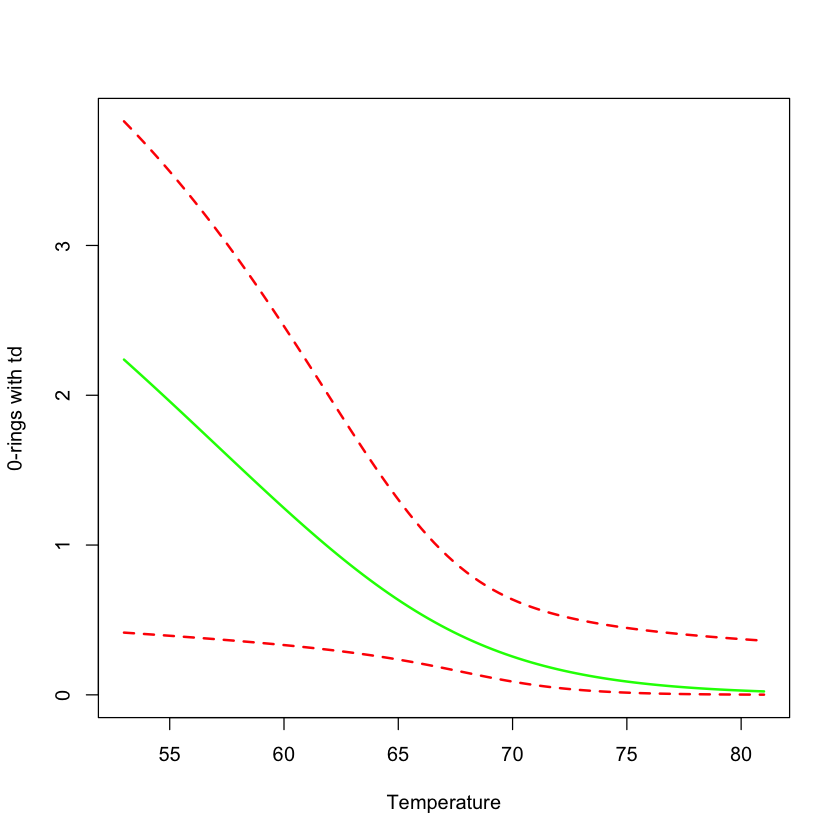

In [30]:
# number of 0-rings with Thermal distress:

p.temp<-logistic(newdat$fit)
p.temp.lower<-logistic(newdat$fit-1.96*newdat$se)
p.temp.upper<-logistic(newdat$fit+1.96*newdat$se)
p.star<-1-(1-p.temp)^(1/6)
p.star.lower<-1-(1-p.temp.lower)^(1/6)
p.star.upper<-1-(1-p.temp.upper)^(1/6)

plot(rep(newdat$temp,2),6*c(p.star.lower,p.star.upper), pch="",
     xlab="Temperature",ylab="0-rings with td")
lines(6*p.star~ temp, data=newdat, col="green", lwd=2)
lines(6*p.star.lower~ temp, data=newdat, col="red",lty=2, lwd=2)
lines(6*p.star.upper~ temp, data=newdat, col="red",lty=2, lwd=2)

In [31]:
# prediction at 29F:

newdat <- data.frame(temp=29)
newdat$fit = predict(model, newdata=newdat)
newdat$se<-predict(model, newdata=newdat,se.fit=T)$se.fit
logistic(newdat$fit)
# [1] 0.9997541

[1] 0.9997541

In [32]:
p.temp<-logistic(newdat$fit)
6*(1-(1-p.temp)^(1/6))
# [1] 4.498164

[1] 4.498164

In [33]:
# Uncertainty; not on slide
p.temp.lower<-logistic(newdat$fit-1.96*newdat$se)
p.temp.upper<-logistic(newdat$fit+1.96*newdat$se)
p.star<-1-(1-p.temp)^(1/6)
# lower limit:
6*(1-(1-p.temp.lower)^(1/6))
# upper limit:
6*(1-(1-p.temp.upper)^(1/6))

# large uncertainty

[1] 0.6413724

[1] 5.62592

In [35]:
# Prediction at Redline (40 degrees) for engineers (not on slides):
 
# Prediction at redline (40F):
newdat <- data.frame(temp=40)
newdat$fit = predict(model, newdata=newdat)
newdat$se<-predict(model, newdata=newdat,se.fit=T)$se.fit
logistic(newdat$fit)
# [1] 0.9968475

[1] 0.9968475

In [36]:
p.temp<-logistic(newdat$fit)
6*(1-(1-p.temp)^(1/6))
# [1] 3.70247

# still rather high

[1] 3.70247